In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
import sklearn
import tensorflow as tf

In [2]:
from sklearn.datasets import load_boston, load_breast_cancer

In [3]:
random_seed = 20220517
random.seed = random_seed

np.random.seed = random_seed
#tf.random.set_seed(random_seed)

In [4]:
boston = load_boston() # boston은 Dictionary 형태

In [5]:
X = pd.DataFrame(boston['data'], columns = boston['feature_names']) # Dictionary 형태를 DataFrame 형태로 변환

In [6]:
Y = boston['target']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [9]:
import tensorflow.keras as keras

---

In [10]:
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, test_size = 0.25, random_state = random_seed)

In [11]:
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()

In [12]:
scaler_X.fit(Train_X)
scaler_Y.fit(Train_Y.reshape(-1,1))

MinMaxScaler()

In [13]:
Scaled_Train_X = scaler_X.transform(Train_X)
Scaled_Train_Y = scaler_Y.transform(Train_Y.reshape(-1,1))

Scaled_Test_X = scaler_X.transform(Test_X)

----
## Deep Learning Framework 사용

In [56]:
tf.random.set_seed(random_seed)
model = keras.Sequential()

model.add(keras.layers.Dense(units = 10, input_shape = (13, ), activation = 'sigmoid'))
model.add(keras.layers.Dense(units = 5, activation = 'sigmoid'))
model.add(keras.layers.Dense(units = 5, activation = 'sigmoid'))
model.add(keras.layers.Dense(units = 1 , activation = 'linear'))

lr = 0.01
model.compile(loss = 'mse', optimizer = keras.optimizers.SGD(learning_rate = lr))

non_scale_history = model.fit(Train_X, Train_Y, batch_size = 32, epochs = 200, shuffle = True, verbose = 0 ,validation_split = 0.2) 
# verbose=0,1,2중 선택
# validation_split -> validation 데이터의 비율을 결정

In [57]:
non_scale_history.history.keys()

dict_keys(['loss', 'val_loss'])

In [58]:
train_loss = non_scale_history.history['loss']
vali_loss = non_scale_history.history['val_loss']

In [59]:
epochs = range(1, len(train_loss)+1)

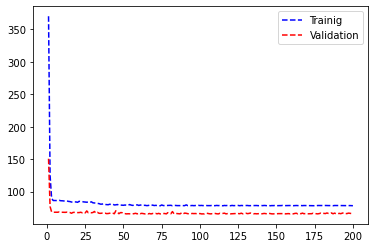

In [60]:
plt.plot(epochs, train_loss, '--b', label = 'Trainig')
plt.plot(epochs, vali_loss, '--r', label = 'Validation')
plt.legend()
plt.show()

In [61]:
non_scale_pred = model.predict(Test_X)

In [62]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape

In [63]:
non_scaled_2layers_nn_mse = mse(y_true = Test_Y, y_pred = non_scale_pred)
non_scaled_2layers_nn_mae = mae(y_true = Test_Y, y_pred = non_scale_pred)
non_scaled_2layers_nn_mape = mape(y_true = Test_Y, y_pred = non_scale_pred)

In [64]:
print("Non Scaled 2 Layers Neural Network MSE : {:.3f}".format(non_scaled_2layers_nn_mse))
print("Non Scaled 2 Layers Neural Network MAE : {:.3f}".format(non_scaled_2layers_nn_mae))
print("Non Scaled 2 Layers Neural Network MAPE : {:.3f}".format(non_scaled_2layers_nn_mape))

Non Scaled 2 Layers Neural Network MSE : 79.831
Non Scaled 2 Layers Neural Network MAE : 6.344
Non Scaled 2 Layers Neural Network MAPE : 0.298


----

In [42]:
from sklearn.linear_model import LinearRegression as LR

In [43]:
lr = LR()

In [44]:
lr.fit(Train_X, Train_Y)
non_scale_LR_pred = lr.predict(Test_X)

In [45]:
non_scaled_lr_mse = mse(y_true = Test_Y, y_pred = non_scale_LR_pred)
non_scaled_lr_mae = mae(y_true = Test_Y, y_pred = non_scale_LR_pred)
non_scaled_lr_mape = mape(y_true = Test_Y, y_pred = non_scale_LR_pred)

In [46]:
print("Non Scaled Linear Regression MSE : {:.3f}".format(non_scaled_lr_mse))
print("Non Scaled Linear Regression MAE : {:.3f}".format(non_scaled_lr_mae))
print("Non Scaled Linear Regression MAPE : {:.3f}".format(non_scaled_lr_mape))

Non Scaled Linear Regression MSE : 28.297
Non Scaled Linear Regression MAE : 3.774
Non Scaled Linear Regression MAPE : 0.188


----

# Scaled Data로 학습

In [203]:
tf.random.set_seed(random_seed)
model = keras.Sequential()

model.add(keras.layers.Dense(units = 10, input_shape = (13, ), activation = 'sigmoid'))
model.add(keras.layers.Dense(units = 5, activation = 'sigmoid'))
model.add(keras.layers.Dense(units = 5, activation = 'sigmoid'))
#model.add(keras.layers.Dense(units = 5, activation = 'sigmoid'))
model.add(keras.layers.Dense(units = 1 , activation = 'linear'))

lr = 0.01
model.compile(loss = 'mse', optimizer = keras.optimizers.Adam(learning_rate = lr))

scale_history = model.fit(Scaled_Train_X, Scaled_Train_Y, batch_size = 32, epochs = 500, shuffle = True, verbose = 0 ,validation_split = 0.2) 
# verbose=0,1,2중 선택
# validation_split -> validation 데이터의 비율을 결정

In [204]:
Scaled_train_loss = scale_history.history['loss']
Scaled_vali_loss = scale_history.history['val_loss']

In [205]:
Scaled_epochs = range(1, len(Scaled_train_loss)+1)

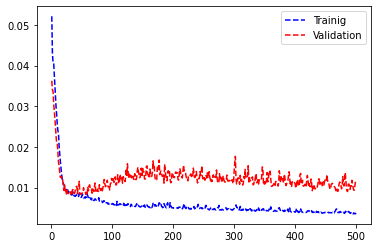

In [206]:
plt.plot(Scaled_epochs, Scaled_train_loss, '--b', label = 'Trainig')
plt.plot(Scaled_epochs, Scaled_vali_loss, '--r', label = 'Validation')
plt.legend()
plt.show()

In [207]:
scale_pred = model.predict(Scaled_Test_X)

In [208]:
scale_pred = scaler_Y.inverse_transform(scale_pred)

In [209]:
scaled_2layers_nn_mse = mse(y_true = Test_Y, y_pred = scale_pred)
scaled_2layers_nn_mae = mae(y_true = Test_Y, y_pred = scale_pred)
scaled_2layers_nn_mape = mape(y_true = Test_Y, y_pred = scale_pred)

In [210]:
print("Scaled 2 Layers Neural Network MSE : {:.3f}".format(scaled_2layers_nn_mse))
print("Scaled 2 Layers Neural Network MAE : {:.3f}".format(scaled_2layers_nn_mae))
print("Scaled 2 Layers Neural Network MAPE : {:.3f}".format(scaled_2layers_nn_mape))

Scaled 2 Layers Neural Network MSE : 10.974
Scaled 2 Layers Neural Network MAE : 2.434
Scaled 2 Layers Neural Network MAPE : 0.123


----

In [89]:
Scaled_lr = LR()

In [90]:
Scaled_lr.fit(Scaled_Train_X, Scaled_Train_Y)
scale_LR_pred = Scaled_lr.predict(Scaled_Test_X)

In [91]:
scale_lr_pred = scaler_Y.inverse_transform(scale_LR_pred)

In [92]:
scaled_lr_mse = mse(y_true = Test_Y, y_pred = scale_lr_pred)
scaled_lr_mae = mae(y_true = Test_Y, y_pred = scale_lr_pred)
scaled_lr_mape = mape(y_true = Test_Y, y_pred = scale_lr_pred)

In [93]:
print("Scaled Linear Regression MSE : {:.3f}".format(scaled_lr_mse))
print("Scaled Linear Regression MAE : {:.3f}".format(scaled_lr_mae))
print("Scaled Linear Regression MAPE : {:.3f}".format(scaled_lr_mape))

Scaled Linear Regression MSE : 28.297
Scaled Linear Regression MAE : 3.774
Scaled Linear Regression MAPE : 0.188


----

In [195]:
from sklearn.ensemble import RandomForestRegressor

In [197]:
LF = RandomForestRegressor(random_state = random_seed, n_estimators = 200)

In [198]:
LF.fit(Scaled_Train_X, Scaled_Train_Y)

<ipython-input-198-9b206fb9da8b>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  LF.fit(Scaled_Train_X, Scaled_Train_Y)


RandomForestRegressor(n_estimators=200, random_state=20220517)

In [200]:
pred_LF = LF.predict(Scaled_Test_X).reshape(-1, 1)
pred_scale_LF = scaler_Y.inverse_transform(pred_LF)

In [202]:
scaled_lf_mse = mse(y_true = Test_Y, y_pred = pred_scale_LF)
scaled_lf_mae = mae(y_true = Test_Y, y_pred = pred_scale_LF)
scaled_lf_mape = mape(y_true = Test_Y, y_pred = pred_scale_LF)

print("Scaled Random Forest MSE : {:.3f}".format(scaled_lf_mse))
print("Scaled Random Forest MAE : {:.3f}".format(scaled_lf_mae))
print("Scaled Random Forest MAPE : {:.3f}".format(scaled_lf_mape))

Scaled Random Forest MSE : 10.507
Scaled Random Forest MAE : 2.264
Scaled Random Forest MAPE : 0.108


----
# Classification MLP

In [211]:
breast = load_breast_cancer() 